# ABT

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (16, 8)

## Data Processing

Считаем данные и приведем в датафрейм.

In [2]:
!du -sh log.txt.zip

 17M	log.txt.zip


In [3]:
%%time

# Parse and rename columns.
df = pd.read_csv('log.txt.zip', sep='\t', header=None)
for column_num in df:
    column = df[column_num]
    column_name = column.iloc[0].split('=')[0]
    df[column_name] = column.map(lambda s: s.split('=')[1])
    del df[column_num]

# Parse types and make columns tidy.
df = df.rename(columns={'userID': 'user', 'ts': 'date', 'all_cl': 'clicks'})
df.date = df.date.astype('datetime64[ns]')
df.user = df.user.astype('int64')
df.browser = df.browser.map(lambda _: int(_.split('#')[1])).astype('category')
df.clicks = df.clicks.astype('int64')
df.slot = df.slot.astype('category')

# Reordering and sorting.
column_order = ['date', 'user', 'browser', 'clicks', 'slot']
df = df[column_order]
df.sort_values(column_order, inplace=True)
df.reset_index(drop=True, inplace=True)

CPU times: user 37.1 s, sys: 4.03 s, total: 41.1 s
Wall time: 43 s


In [4]:
df.dtypes

date       datetime64[ns]
user                int64
browser          category
clicks              int64
slot             category
dtype: object

Посмотрим, что внутри:

In [5]:
df.head()

,date,user,browser,clicks,slot
0,2016-02-26,1,2,0,exp
1,2016-02-26,1,2,0,exp
2,2016-02-26,1,2,1,exp
3,2016-02-26,3,4,0,exp
4,2016-02-26,5,4,0,exp


In [6]:
df.tail()

,date,user,browser,clicks,slot
6069248,2016-03-03,574386,22,1,exp
6069249,2016-03-03,574387,4,4,control
6069250,2016-03-03,574388,4,0,control
6069251,2016-03-03,574388,4,1,control
6069252,2016-03-03,574388,4,1,control


In [7]:
df.isnull().values.any()  # Check if df has `nan` values.

False

In [8]:
df.describe(include='all').round(2)

,date,user,browser,clicks,slot
count,6069253,6069253.00,6069253.0,6069253.00,6069253
unique,7,NaN,6.0,NaN,2
top,2016-03-03 00:00:00,NaN,4.0,NaN,control
freq,937207,NaN,2072021.0,NaN,3086816
first,2016-02-26 00:00:00,NaN,NaN,NaN,NaN
last,2016-03-03 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,203708.49,NaN,1.07,NaN
std,NaN,145237.96,NaN,1.66,NaN
min,NaN,1.00,NaN,0.00,NaN
25%,NaN,88702.00,NaN,0.00,NaN


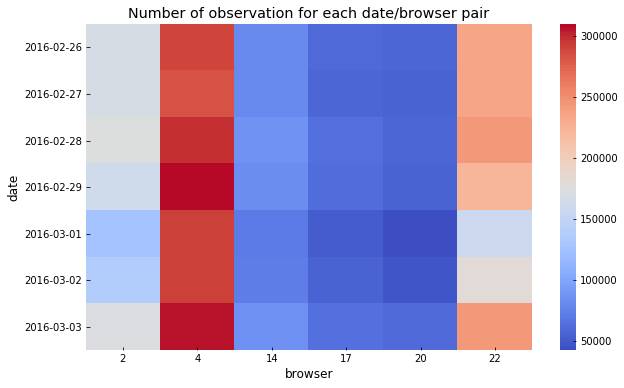

In [9]:
cdf = df.groupby(['date', 'browser']).size().unstack()
cdf.index = cdf.index.map(lambda _: _.date())
cmap = sns.color_palette("coolwarm", 128)
_, ax = plt.subplots(figsize=(10, 6))
ax.set_xticks([])
ax.set_yticks([])
sns.heatmap(cdf, cmap=cmap, ax=ax)
ax.set_title('Number of observation for each date/browser pair');

Сохраняем обработанные чистые данные в формат hdf5 для дальнейшего анализа.

In [10]:
%time df.to_hdf('clean_data.h5', 'df', mode='w', format='t', complevel=9)

CPU times: user 23.4 s, sys: 829 ms, total: 24.2 s
Wall time: 24.9 s


In [11]:
!du -sh clean_data.h5

8,6M	clean_data.h5
